# 복습
## Series
    - 1차원 자료구조
    - 구성요서 2개 : index, values
    - 순서
## DataFrame
    - 2차원 자료구조
    - 구성요소 3개 : column, index, values
    - 순서 => 행방향
## 엑셀 => DF
    - 컬럼 -> 인덱스 -> 데이터값
    - 컬럼: 사용할 컬럼 선택, 컬럼명 세팅
    - 인덱스: 시계열 데이터인 경우 인덱스를 datetime
    - 데이터값: 결측 데이터 체크, 데이터 타입을 체크
    
## merge
    - 2개의 DF를 옆으로 합치기
    - 한번에 2개만 합칠 수 있음
    - inner, outer, left, right ...
    
## concat
    - 여러개의 DF를 한번에 밑으로 합쳐줌
    - [df, df, df, ...] 여러개의 DF를 리스트로 묶어서 입력

In [10]:
import pandas as pd
import python_data_study

In [11]:
path = r'C:\Users\cypark\Desktop\Python을 활용한 빅데이터 분석 실무 실습자료\졸업생의 진로 현황(전체).xlsx'

grade_df = python_data_study.get_gradDf(path)

In [13]:
# 시리즈으의 연산 => 특목고 진학자 숫자, 진학률
# 기존 DF에 새로운 속성들 추가

grade_df['spc_N'] = grade_df['sci_N'] + grade_df['fI_N']

In [18]:
grade_df['spc_R'] = (grade_df['spc_N'] / grade_df['grad_N'] * 100).round(2)

In [22]:
# apply
# 한 시리즈의 전체 데이터에 똑같은 코드를 한번에 적용시켜 줌

grade_df['sido'] = grade_df['local'].apply( lambda x: x.split(' ')[0] )
grade_df['gugun'] = grade_df['local'].apply( lambda x: x.split(' ')[1] )

In [27]:
# groupby 
# 데이터를 특정 컬럼의 카테고리 기준으로 묶어줌
# 멀티 인덱스가 되므로, reset_index 로 바꿔줌

grade_df.groupby(['sido', 'gugun']).sum().reset_index()

,sido,gugun,grad_N,sci_N,fI_N,spc_N,spc_R
0,강원도,강릉시,2127,11,16,27,12.33
1,강원도,고성군,121,0,2,2,2.86
2,강원도,동해시,883,3,5,8,13.50
3,강원도,삼척시,549,0,3,3,1.95
4,강원도,속초시,884,1,12,13,6.28
...,...,...,...,...,...,...,...
224,충청북도,제천시,1195,1,0,1,0.56
225,충청북도,증평군,339,2,3,5,4.89
226,충청북도,진천군,646,0,1,1,0.47
227,충청북도,청주시,8475,41,187,228,126.43


In [29]:
path = r'C:\Users\cypark\Desktop\Python을 활용한 빅데이터 분석 실무 실습자료\공시대상학교정보(전체).xlsx'
school_info = pd.read_excel(path)

In [34]:
use_cols = ['정보공시 \n 학교코드', '학교명', '위도', '경도']
school_info2 = school_info[ use_cols ]
school_info2.columns = ['code', 'name', 'lat', 'log']

In [35]:
school_info2

,code,name,lat,log
0,S000003511,서울교육대학교부설초등학교,37.490739,127.015424
1,S000003563,서울대학교사범대학부설초등학교,37.577017,127.003091
2,S010000737,서울개원초등학교,37.481618,127.058738
3,S010000738,서울개일초등학교,37.486214,127.057742
4,S010000741,서울구룡초등학교,37.481193,127.051755
...,...,...,...,...
12179,S170000512,제주영지학교,33.488117,126.542748
12180,S170000513,제주영송학교,33.450047,126.434217
12181,S170000790,서귀포온성학교,33.291338,126.593310
12182,S170000155,제주제일고등학교부설방송통신고등학교,33.480030,126.479518


In [42]:
# merge

total_school = pd.merge(grade_df, school_info2, on='code', how='left')

In [44]:
# 미세먼지 데이터

p = r'C:\Users\cypark\Desktop\Python을 활용한 빅데이터 분석 실무 실습자료\미세먼지\일별평균대기오염도_2020.xlsx'
python_data_study.get_dustDf(p, '성북구')

,date,local,NO2,O3,CO2,SO2,dust,m_dust
date,,,,,,,,
2020-01-01,20200101,성북구,0.044,0.004,0.9,0.003,32.0,21.0
2020-01-02,20200102,성북구,0.048,0.004,1.0,0.004,60.0,37.0
2020-01-03,20200103,성북구,0.044,0.009,1.0,0.004,63.0,41.0
2020-01-04,20200104,성북구,0.048,0.013,1.0,0.004,52.0,34.0
2020-01-05,20200105,성북구,0.054,0.006,1.1,0.004,51.0,36.0
...,...,...,...,...,...,...,...,...
2020-12-27,20201227,성북구,0.040,0.010,0.9,0.003,63.0,41.0
2020-12-28,20201228,성북구,0.049,0.005,1.0,0.003,67.0,44.0
2020-12-29,20201229,성북구,0.036,0.010,1.0,0.003,65.0,43.0


In [48]:
# 2010 ~2020 년도 데이터 다 가져오기

p = r'C:\Users\cypark\Desktop\Python을 활용한 빅데이터 분석 실무 실습자료\미세먼지\일별평균대기오염도_{}.xlsx'
local = '종로구'

df_list = []
for year in range(2010, 2021):
    temp_df = python_data_study.get_dustDf(p.format(year), local)
    df_list.append(temp_df)
    
total_dust = pd.concat( df_list )

In [49]:
total_dust

,date,local,NO2,O3,CO2,SO2,dust,m_dust
date,,,,,,,,
2010-01-01,20100101,종로구,0.038,0.010,0.8,0.008,36.0,NaN
2010-01-02,20100102,종로구,0.033,0.015,0.7,0.009,53.0,NaN
2010-01-03,20100103,종로구,0.033,0.020,0.7,0.008,44.0,NaN
2010-01-04,20100104,종로구,0.039,0.014,0.9,0.006,43.0,NaN
2010-01-05,20100105,종로구,0.025,0.028,0.6,0.008,48.0,NaN
...,...,...,...,...,...,...,...,...
2020-12-27,20201227,종로구,0.040,0.013,0.8,0.004,70.0,42.0
2020-12-28,20201228,종로구,0.050,0.009,0.9,0.004,66.0,44.0
2020-12-29,20201229,종로구,0.035,0.011,0.9,0.004,69.0,46.0


# 데이터 시각화

In [53]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()

rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

import seaborn as sns

## 기본폼

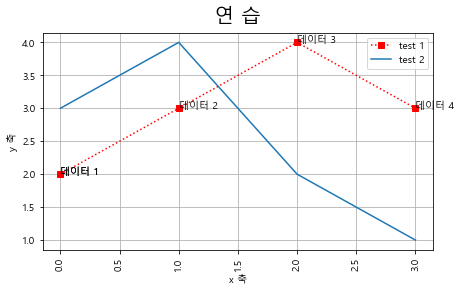

In [81]:
# ls: line style

plt.figure( figsize=(7, 4) ) # 시작

plt.title( '연 습', size=20, pad=10)
plt.xlabel('x 축')
plt.ylabel('y 축')

plt.plot( [2,3,4,3], color='red', ls=':', marker='s', label='test 1')
plt.plot( [3,4,2,1], label='test 2' )

plt.legend() # 범례
plt.xticks( rotation=90 ) # x축값 조정
plt.grid()  # 배경에 실선
plt.text(0, 2, '데이터 1')  # 글자 넣기

k = 0
for y in [2,3,4,3]:
    plt.text(k, y, '데이터 {}'.format(k+1))
    k = k + 1

plt.show() # 마침표

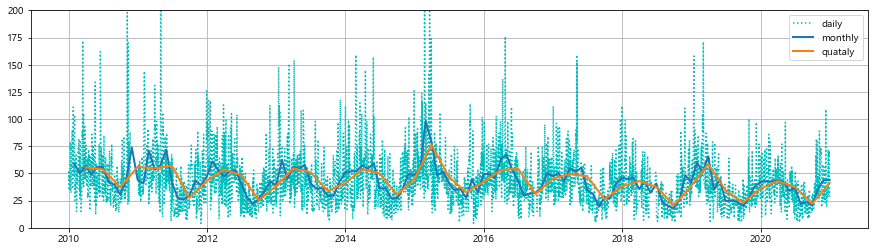

In [95]:
# 미세먼지 데이터 그래프 그리기

plt.figure(figsize=(15,4))

plt.plot( total_dust['dust'], ls=':', label='daily', color='c')
plt.plot( total_dust['dust'].resample('m').mean(), lw=2, label='monthly')
plt.plot( total_dust['dust'].resample('q').mean(), lw=2, label='quataly')

plt.ylim( [0, 200])
plt.legend()
plt.grid()

plt.show()

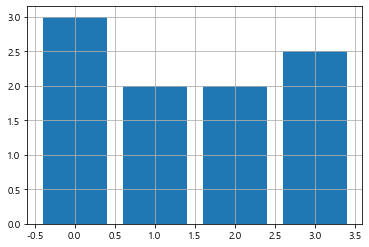

In [98]:
# 막대 그래프 - x, y 값을 넣어야 함

plt.figure()

plt.bar([0, 1, 2, 3], [3, 2, 2, 2.5])

plt.grid()
plt.show()

In [101]:
# 특목고 진학률이 높은 학교 top 20 막대 그래프로

top_20 = total_school.sort_values('spc_R', ascending=False)[:20]

In [103]:
y = top_20['spc_R']
x = top_20['name']

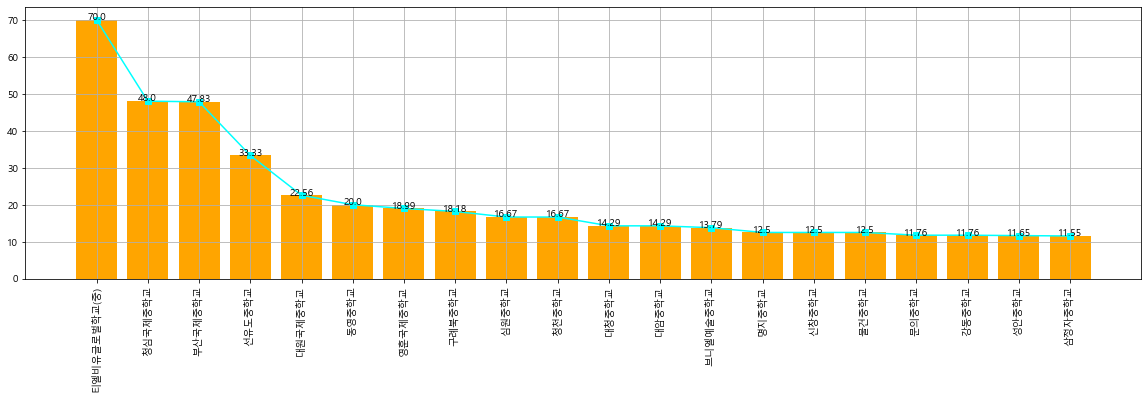

In [126]:
plt.figure(figsize=(20, 5))

plt.bar(range(0, len(y)), y, color='orange')
plt.plot(x, y, marker='s', color='aqua')

plt.grid()

for i in range(0, len(y)):
    plt.text(i, y.iloc[i], y.iloc[i], ha='center')
    
plt.xticks( range(0, len(y)), x, rotation=90 )

plt.show()

## 2. 왜 시각화를 하는가? (시각화 목적)
- 데이터를 이해하기 위해서
- 어떤 데이터를 이해하기 위해서 어떤 시각화가 필요한가?

### 2.1 데이터 분류
- 카테고리 
- 연속된 숫자 데이터

### 2.2 카테고리 데이터 이해하기
- 분포 => 카테고리 별 데이터의 갯수
- sns의 countplot

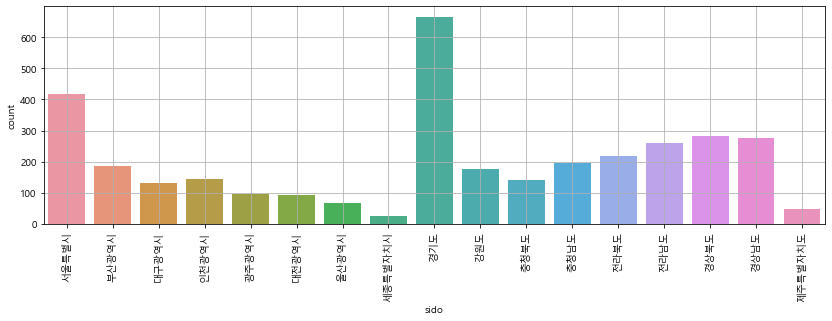

In [135]:
plt.figure(figsize=(14,4))

sns.countplot( data=total_school, x='sido')

plt.xticks(rotation=90)
plt.grid()
plt.show()

In [136]:
tip_df = sns.load_dataset('tips')

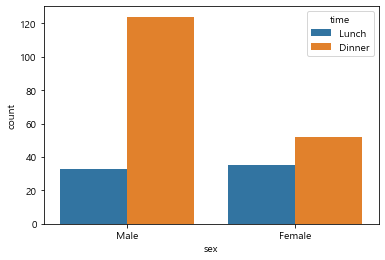

In [139]:
plt.figure()

sns.countplot( data=tip_df, x='sex', hue='time' )

plt.show()

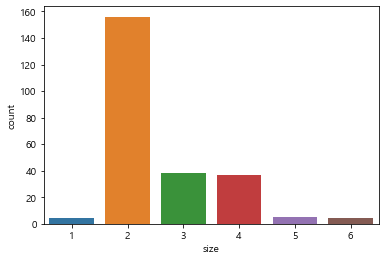

In [144]:
plt.figure()

sns.countplot( data=tip_df, x='size')

plt.show()

### 2.3 연속된 숫자 데이터 이해하기
- 분포 => 구간별 데이터의 갯수, 밀도 => 히스토그램, 분포도
- sns 의 histplot, distplot 사용

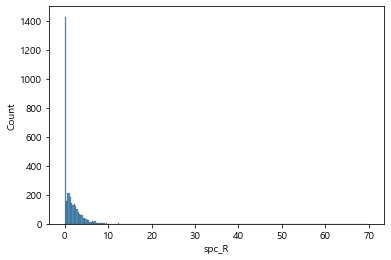

In [147]:
plt.figure()

sns.histplot( data=total_school, x='spc_R')

plt.show()

C:\Users\cypark\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\cypark\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


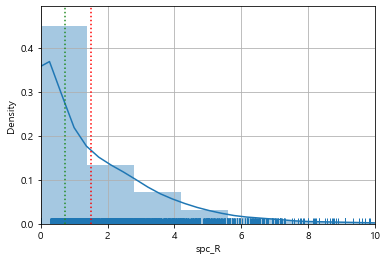

In [167]:
plt.figure()

sns.distplot( total_school['spc_R'], rug=True )

plt.axvline( total_school['spc_R'].mean(), color='red', ls=':')
plt.axvline( total_school['spc_R'].median(), color='forestgreen', ls=':')

plt.xlim([0, 10])

plt.grid()
plt.show()

C:\Users\cypark\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


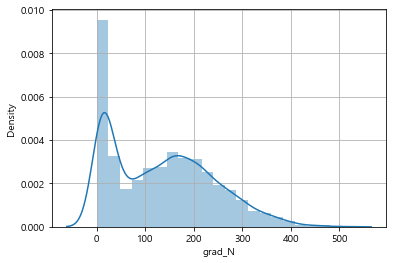

In [188]:
plt.figure()

sns.distplot(total_school['grad_N'])

plt.grid()
plt.show()

In [191]:
big_sido = ['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시', 
            '세종특별자치시', '경기도']

total_school['sido'].unique()

True


array(['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
       '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도',
       '경상남도', '제주특별자치도'], dtype=object)

In [193]:
total_school['is_bigSido'] = total_school['sido'].apply( lambda x: True if x in big_sido else False)

C:\Users\cypark\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\cypark\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


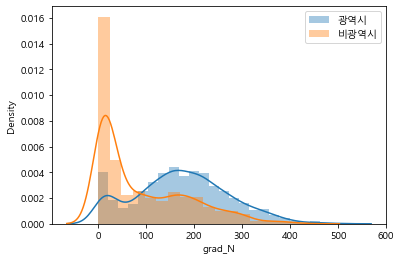

In [198]:
plt.figure()

sns.distplot( total_school[ total_school['is_bigSido']== True ]['grad_N'], label='광역시')
sns.distplot( total_school[ total_school['is_bigSido']== False ]['grad_N'], label='비광역시')
plt.legend()

plt.show()

### 2.4 카테고리 데이터와 연속된 숫자 데이터 간의 관계
- 카테고리 별 분포
- sns의 boxplot, violinplot

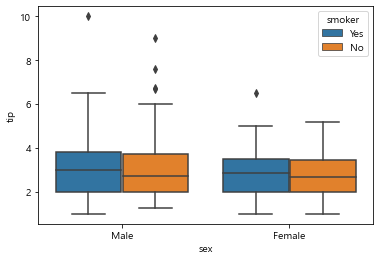

In [202]:
plt.figure()


sns.boxplot(data=tip_df, x='sex', y='tip', hue='smoker')


plt.show()

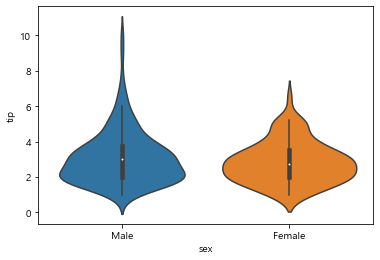

In [201]:
plt.figure()


sns.violinplot(data=tip_df, x='sex', y='tip')


plt.show()

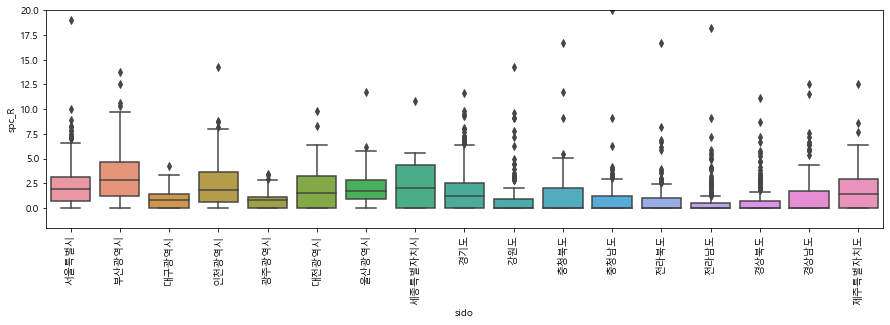

In [211]:
plt.figure(figsize=(15,4))


sns.boxplot(data=total_school, x='sido', y='spc_R')

plt.ylim(-2, 20)
plt.xticks(rotation=90)

plt.show()

### 2.5 연속된 숫자 데이터와 연속된 숫자 데이터 간의 관계
- 산포도
- matplot => scatter
- sns => joinplot

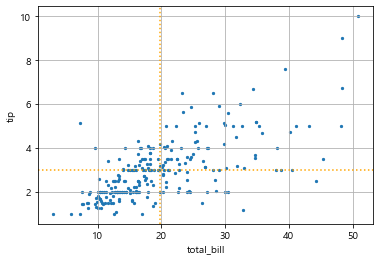

In [218]:
x = tip_df['total_bill']
y = tip_df['tip']

plt.figure()

plt.xlabel(x.name)
plt.ylabel(y.name)
plt.scatter(x, y, s=5)

plt.axvline( x.mean(), color='orange', ls=':')
plt.axhline( y.mean(), color='orange', ls=':')

plt.grid()
plt.show()

<Figure size 432x288 with 0 Axes>

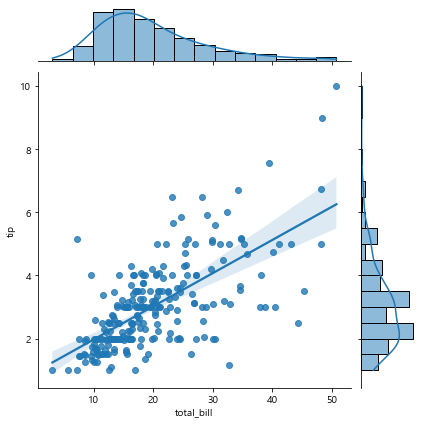

In [220]:
plt.figure()

sns.jointplot(data=tip_df, x='total_bill', y='tip', kind='reg')

plt.show()

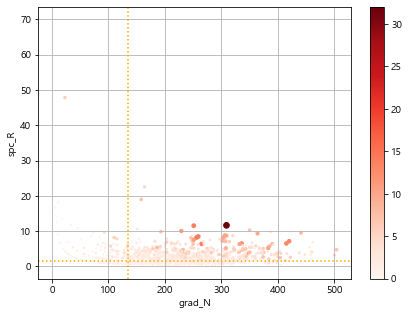

In [234]:
x = total_school['grad_N']
y = total_school['spc_R']

plt.figure(figsize=(7,5))

plt.xlabel(x.name)
plt.ylabel(y.name)
plt.scatter(x, y, s=total_school['sci_N'], c=total_school['sci_N'], cmap='Reds')

plt.colorbar()
plt.axvline( x.mean(), color='orange', ls=':')
plt.axhline( y.mean(), color='orange', ls=':')

plt.grid()
plt.show()

### 2.5 카테고리 데이터와 카테로리 데이터 간의 관계
- sns의 countplot에서 hue를 이용
- groupby, pivot을 이용해서 카테고리별로 데이터를 집계하고 heaptmap

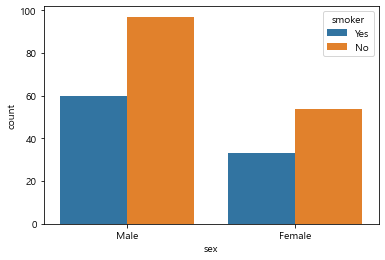

In [237]:
plt.figure()

sns.countplot(data=tip_df, x='sex', hue='smoker')

plt.show()

<AxesSubplot:xlabel='smoker', ylabel='sex'>

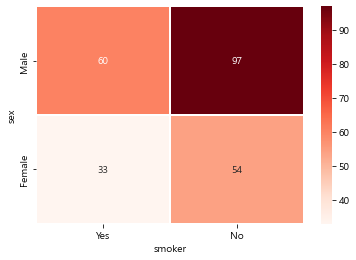

In [248]:
# pivot

temp = pd.pivot_table(data=tip_df, index='sex', columns='smoker', values='tip', aggfunc='count')

sns.heatmap(temp, cmap='Reds', annot=True, linewidths=2)

# 데이터 시각화 실습

In [249]:
# 아파트 데이터 가져오기

df_list = []

for year in range(2021, 2022):
    for month in range(1, 13):
        date = str(year) + str(month).zfill(2)
        path = r'C:\Users\cypark\Desktop\Python을 활용한 빅데이터 분석 실무 실습자료\부동산 데이터 실습\아파트 실거래가 {}\{}_실거래가.xlsx'
        temp_df = pd.read_excel(path.format(year, date), index_col=0)
        df_list.append(temp_df)

In [251]:
apt_df = pd.concat(df_list, ignore_index=True)

In [252]:
apt_df

,시도,구군,거래금액,거래유형,건축년도,법정동,아파트,년,월,일,전용면적,중개사소재지,지번,층
0,서울특별시,종로구,"130,000",NaN,2000,청운동,청운현대,2021,1,14,129.76,NaN,56-45,2
1,서울특별시,종로구,"150,000",NaN,2008,사직동,광화문스페이스본(106동),2021,1,7,144.52,NaN,9-1,6
2,서울특별시,종로구,"175,000",NaN,2004,내수동,경희궁의아침2단지,2021,1,15,174.55,NaN,71,4
3,서울특별시,종로구,"175,000",NaN,2004,내수동,경희궁의아침2단지,2021,1,15,174.55,NaN,71,4
4,서울특별시,종로구,"180,000",NaN,2004,내수동,경희궁의아침3단지,2021,1,17,123.13,NaN,72,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603606,세종특별자치시,세종특별자치시,"6,400",직거래,1992,전의면 동교리,재동,2021,12,18,59.87,NaN,197-16,5
603607,세종특별자치시,세종특별자치시,"6,200",중개거래,2001,전의면 유천리,민석그린,2021,12,11,45.57,세종시,528,5
603608,세종특별자치시,세종특별자치시,"7,000",중개거래,2001,전의면 유천리,민석그린,2021,12,14,59.94,세종시,528,1
603609,세종특별자치시,세종특별자치시,"6,500",직거래,1996,소정면 운당리,무궁화,2021,12,13,59.40,NaN,35-1,7


In [259]:
apt_df['거래금액'] = apt_df['거래금액'].apply( lambda x: int(x.replace(',', ''))) 

In [260]:
apt_df

,시도,구군,거래금액,거래유형,건축년도,법정동,아파트,년,월,일,전용면적,중개사소재지,지번,층
0,서울특별시,종로구,130000,NaN,2000,청운동,청운현대,2021,1,14,129.76,NaN,56-45,2
1,서울특별시,종로구,150000,NaN,2008,사직동,광화문스페이스본(106동),2021,1,7,144.52,NaN,9-1,6
2,서울특별시,종로구,175000,NaN,2004,내수동,경희궁의아침2단지,2021,1,15,174.55,NaN,71,4
3,서울특별시,종로구,175000,NaN,2004,내수동,경희궁의아침2단지,2021,1,15,174.55,NaN,71,4
4,서울특별시,종로구,180000,NaN,2004,내수동,경희궁의아침3단지,2021,1,17,123.13,NaN,72,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
603606,세종특별자치시,세종특별자치시,6400,직거래,1992,전의면 동교리,재동,2021,12,18,59.87,NaN,197-16,5
603607,세종특별자치시,세종특별자치시,6200,중개거래,2001,전의면 유천리,민석그린,2021,12,11,45.57,세종시,528,5
603608,세종특별자치시,세종특별자치시,7000,중개거래,2001,전의면 유천리,민석그린,2021,12,14,59.94,세종시,528,1
603609,세종특별자치시,세종특별자치시,6500,직거래,1996,소정면 운당리,무궁화,2021,12,13,59.40,NaN,35-1,7


- 카테고리 데이터 - sns.countplot
- 연속된 숫자데이터 - sns.histplot, distplot
- 카테고리, 숫자 - sns.boxplot, violinplot
- 숫자, 숫자 - plt.scatter, sns.joinplot
- 카테고리, 카테고리 - sns.countplot(hue=), pivot 의 heatmap

- 카테고리 데이터
    - 시도, 구군, 거래유형, 아파트, 건축년도
- 숫자 데이터
    - 거래금액, 전용면적, 년월일

In [264]:
cond1 = apt_df['시도'] == '서울특별시'
cond2 = apt_df['구군'] == '종로구'

seoul_df = apt_df[ cond1 ]

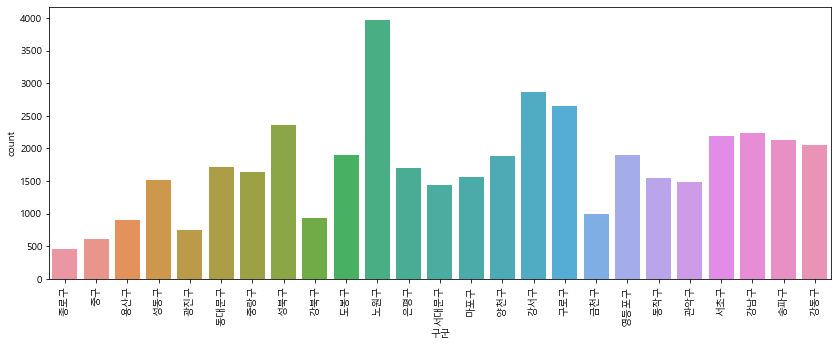

In [267]:
# 서울구 별 아파트 개수

plt.figure(figsize=(14,5))

sns.countplot( data=seoul_df, x='구군')

plt.xticks(rotation=90)
plt.show()

C:\Users\cypark\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\cypark\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


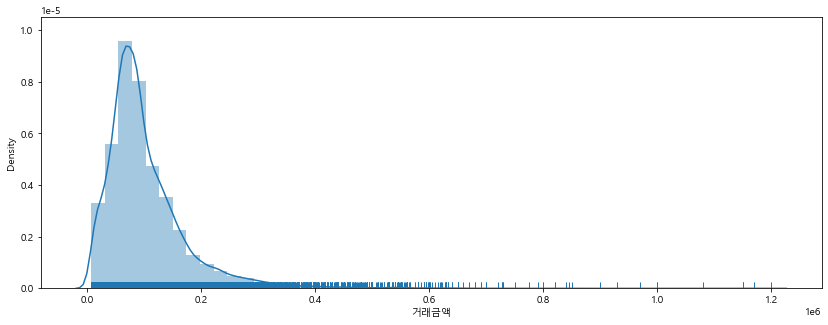

In [311]:
# 거래금액 

plt.figure(figsize=(14,5))

sns.distplot( seoul_df['거래금액'], rug=True )

plt.show()

In [275]:
# 거래금액 top100 아파트의 지역 분포

seoul_top20 = seoul_df.sort_values('거래금액', ascending=False)[:100]

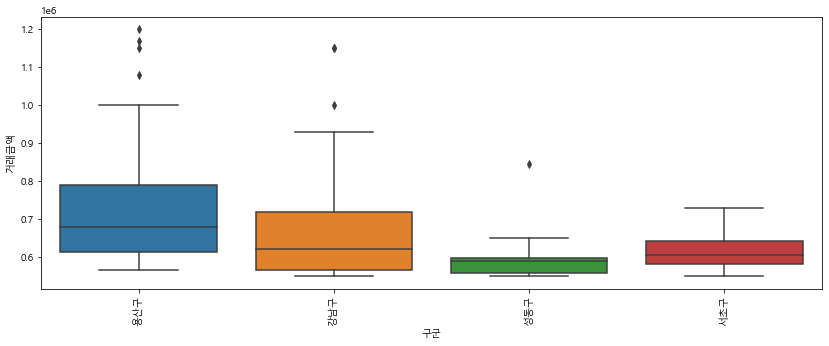

In [276]:
# 카테고리, 숫자 비교

data = seoul_top20
x='구군'
y='거래금액'

plt.figure(figsize=(14,5))

sns.boxplot( data=data, x=x, y=y)

plt.xticks(rotation=90)
plt.show()

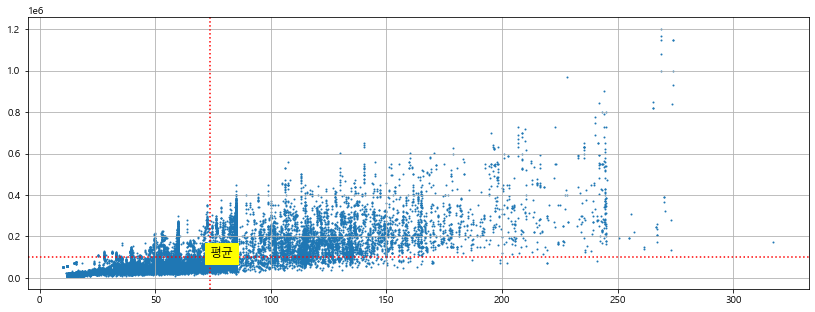

In [299]:
# 거래금액, 전용면적 상관관계
x = seoul_df['전용면적']
y = seoul_df['거래금액']

plt.figure(figsize=(14,5))

plt.scatter(x=x, y=y, s=1)
plt.axvline(x.mean(), color='red', ls=':')
plt.axhline(y.mean(), color='red', ls=':')

plt.text(x.mean(), y.mean(), '평균', color='black', backgroundcolor='yellow', size=12)

plt.grid()
plt.show()

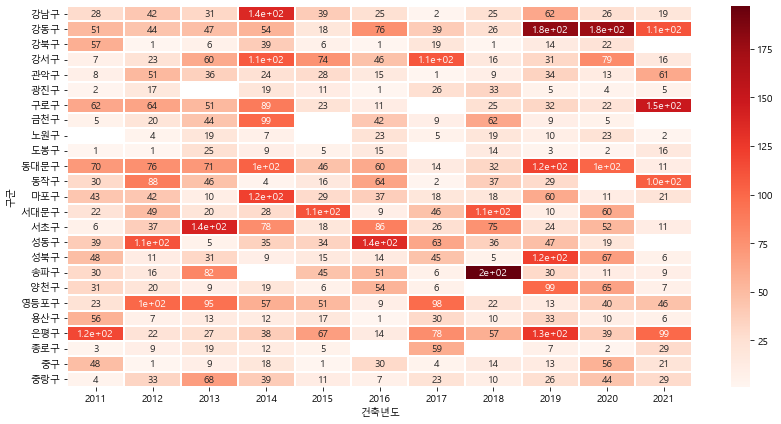

In [310]:
# 건축년도, 구군
data = seoul_df [seoul_df['건축년도'] > 2010 ]
index = '구군'
columns = '건축년도'
values = '아파트'

plt.figure(figsize=(14, 7))

temp = pd.pivot_table(data=data, index=index, columns=columns, values=values, aggfunc='count')

sns.heatmap(temp, cmap='Reds', annot=True, linewidths=2)

plt.show()

C:\Users\cypark\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\cypark\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


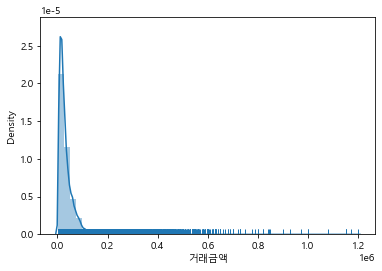

In [313]:
# 거래금액 살펴보기

plt.figure()

sns.distplot( apt_df['거래금액'], rug=True)

plt.show()

In [318]:
apt_df['거래금액(억)'] = apt_df['거래금액'] / 10000

C:\Users\cypark\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\cypark\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


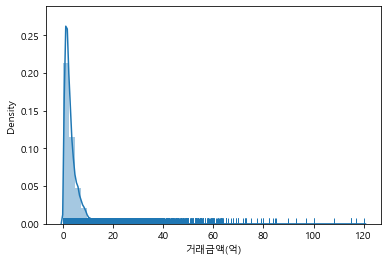

In [319]:
# 거래금액 살펴보기

plt.figure()

sns.distplot( apt_df['거래금액(억)'], rug=True)

plt.show()

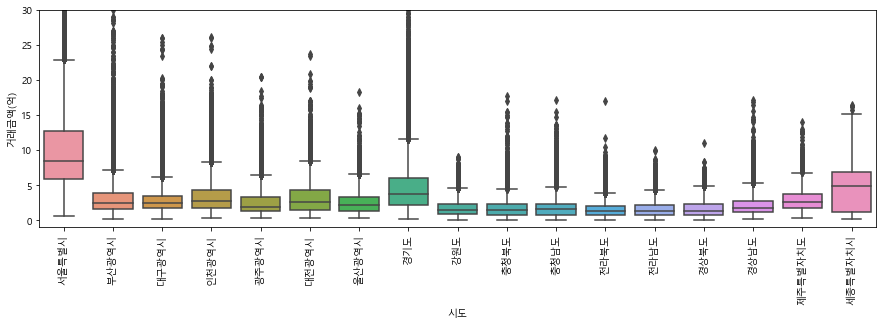

In [324]:
plt.figure(figsize=(15,4))

sns.boxplot( data=apt_df, x='시도', y='거래금액(억)')

plt.ylim(-1, 30)
plt.xticks(rotation=90)
plt.show()

In [346]:
def show_price_in_sido(temp_df, sido, y_lim=None):
    temp_df = apt_df [apt_df['시도']==sido]

    plt.figure(figsize=(15,4))
    sns.boxplot( data=temp_df, x='구군', y='거래금액(억)')
    
    if y_lim:
        plt.ylim(-1, 30)
    else:
        plt.ylim( y_lim )
    plt.xticks(rotation=90)
    plt.show()

서울특별시


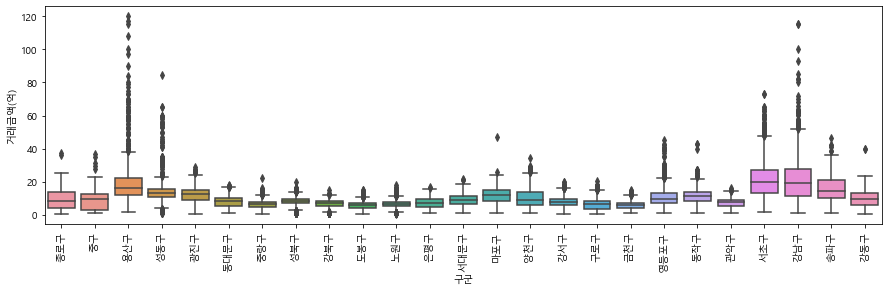

부산광역시


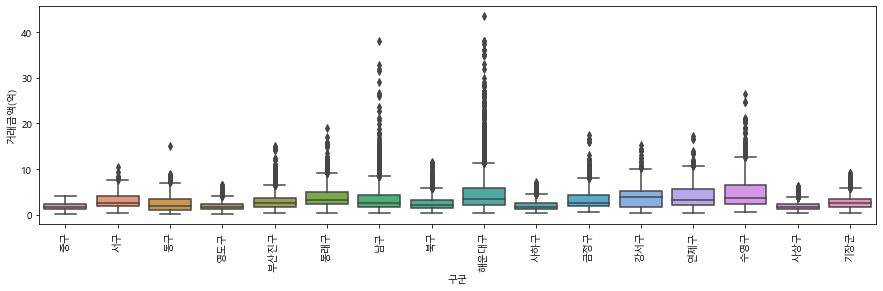

대구광역시


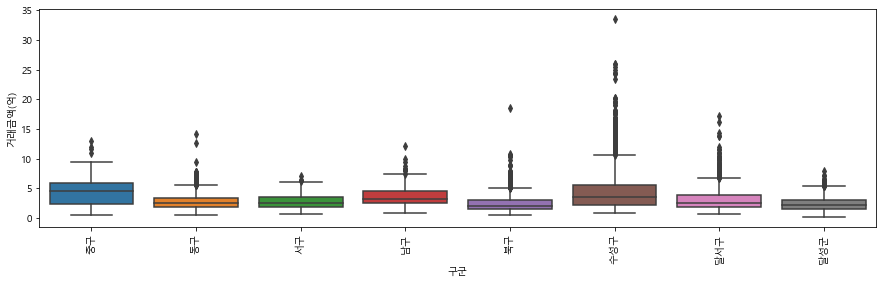

인천광역시


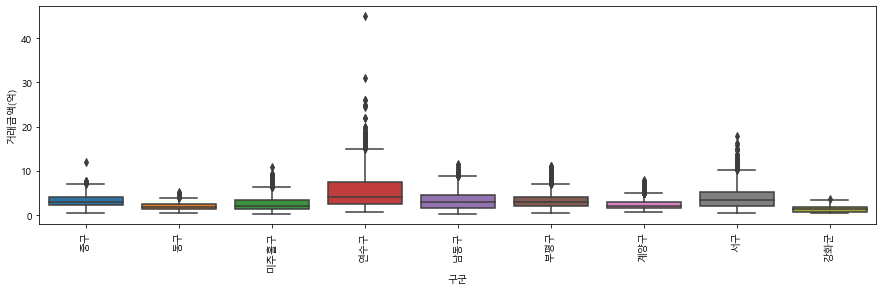

광주광역시


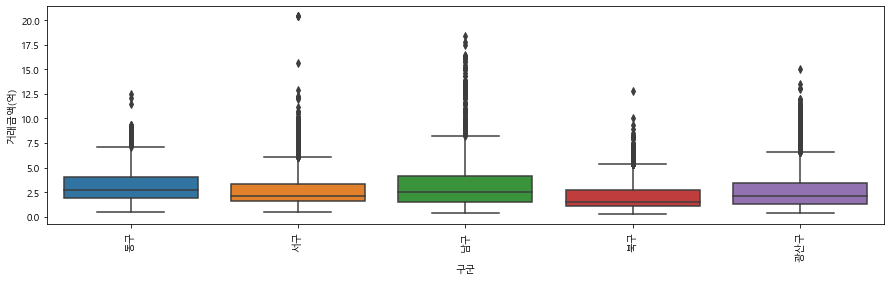

대전광역시


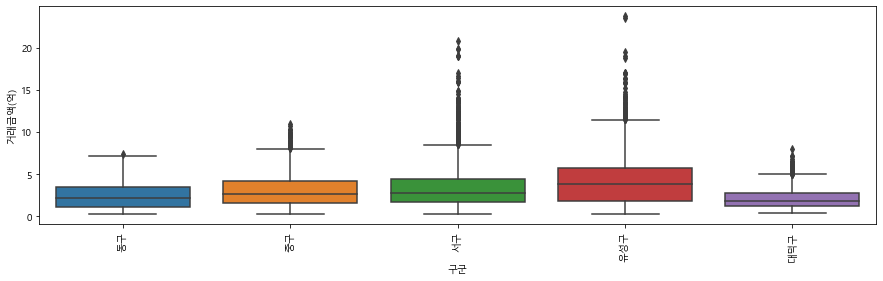

울산광역시


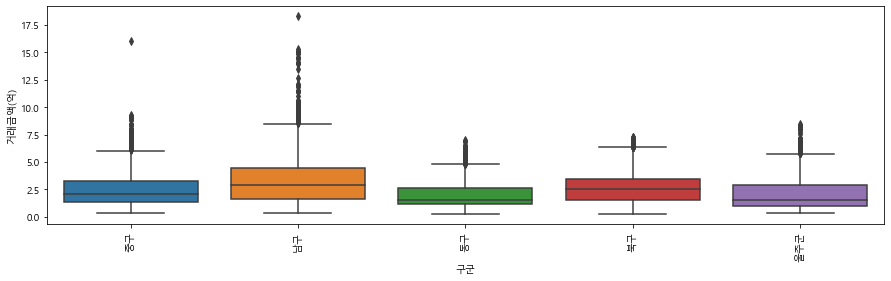

경기도


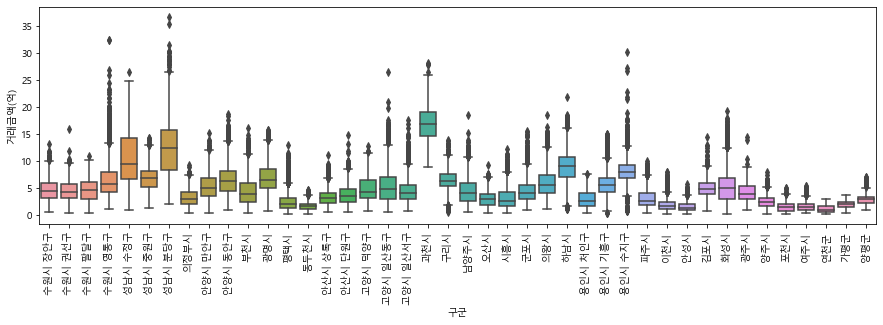

강원도


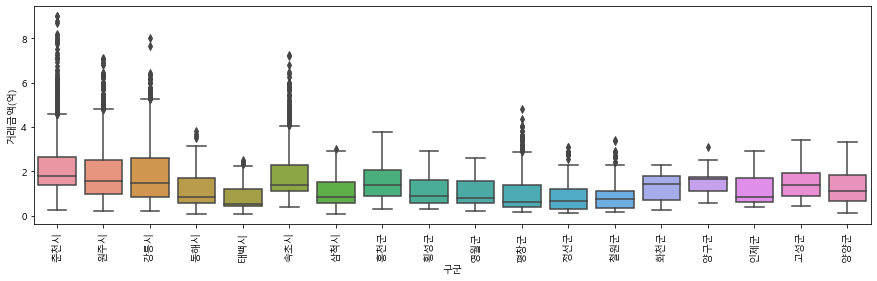

충청북도


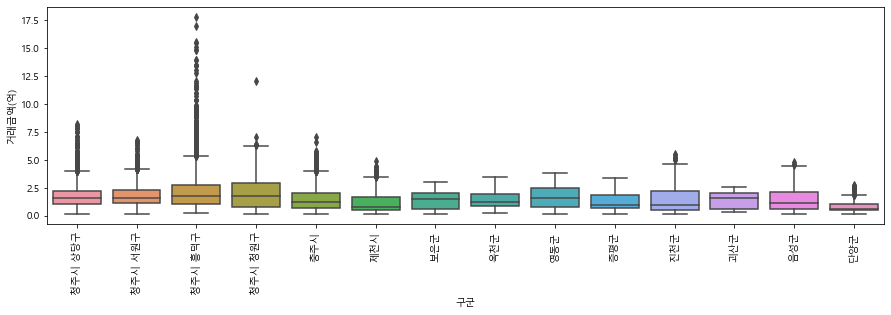

충청남도


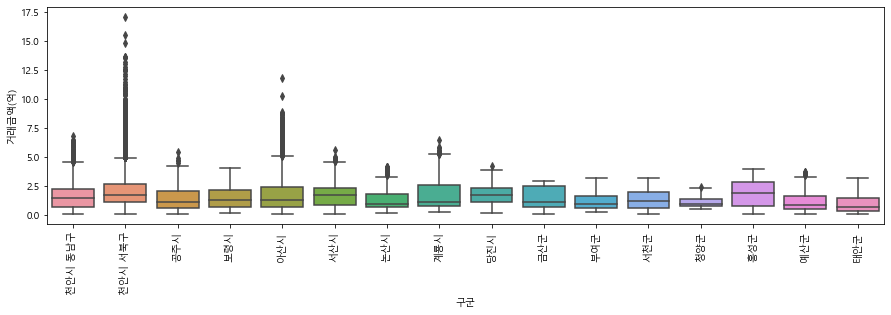

전라북도


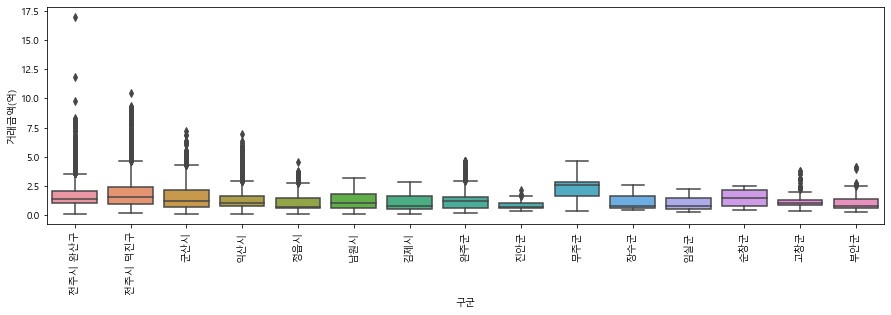

전라남도


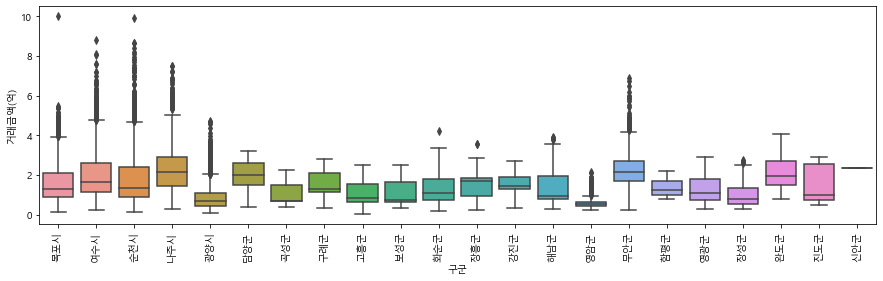

경상북도


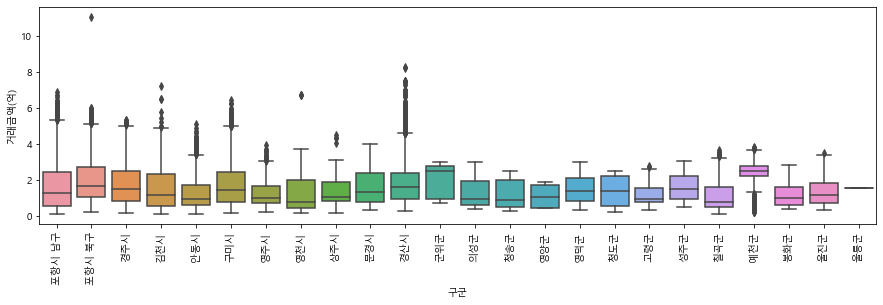

경상남도


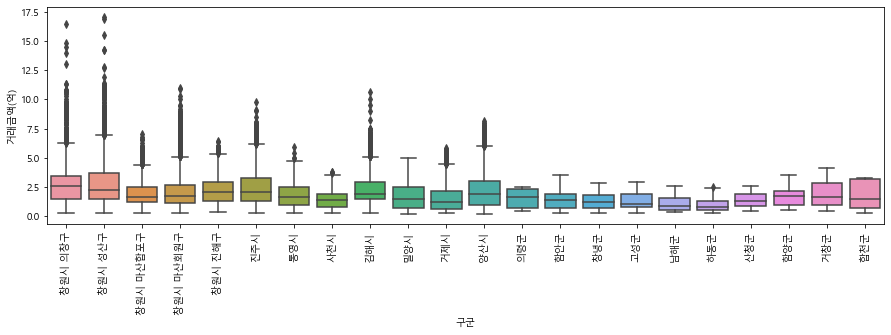

제주특별자치도


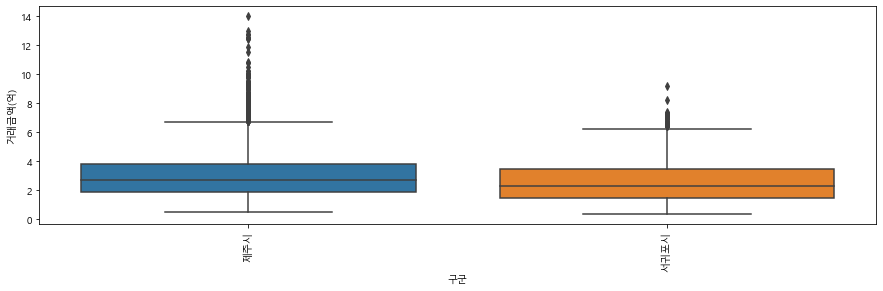

세종특별자치시


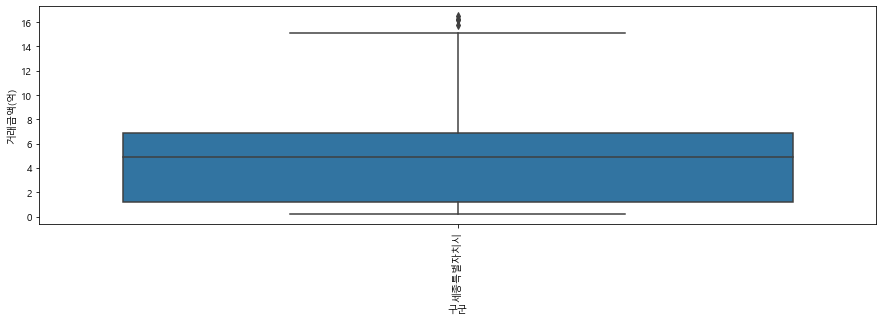

In [336]:
sido_list = apt_df['시도'].unique()

for sido in sido_list:
    print(sido)
    show_price_in_sido(apt_df, sido)

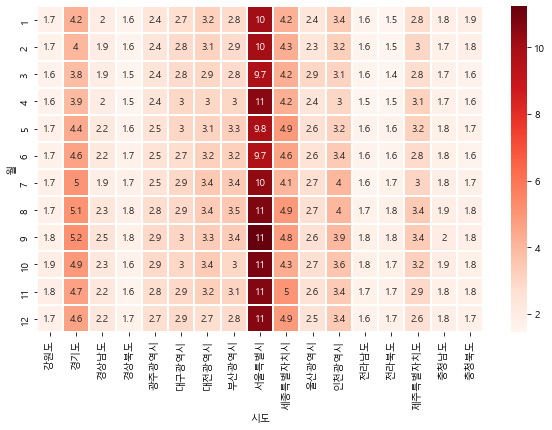

In [355]:
# 월별로 데이터가 어떻게 변했는지
# pivot_table
# 두개의 카테고리를 조합해서 새로운 테이블을 만들어 줌

temp_df = pd.pivot_table(apt_df, index='월', columns='시도', values='거래금액(억)', aggfunc='mean')

plt.figure(figsize=(10, 6))

sns.heatmap(temp_df, cmap='Reds', annot=True, linewidths=2)

plt.show()

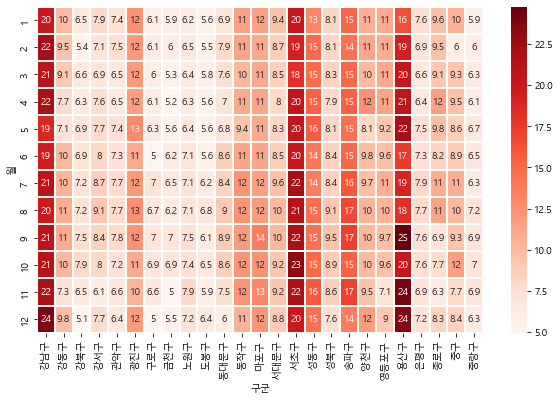

In [354]:
# 특정 시도에서 구군 단위로 보기

gugun_df = apt_df [apt_df['시도']=='서울특별시']

temp_df = pd.pivot_table(gugun_df, index='월', columns='구군', values='거래금액(억)', aggfunc='mean')

plt.figure(figsize=(10, 6))

sns.heatmap(temp_df, cmap='Reds', annot=True, linewidths=2)

plt.show()

In [358]:
def show_month_price_in_sido(temp_df, sido, y_lim=None):
    gugun_df = apt_df [apt_df['시도']==sido]
    temp_df = pd.pivot_table(gugun_df, index='월', columns='구군', values='거래금액(억)', aggfunc='mean')
    
    plt.figure(figsize=(len(temp_df.columns), 6))

    sns.heatmap(temp_df, cmap='Greens', annot=True, linewidths=2)
    plt.show()

서울특별시


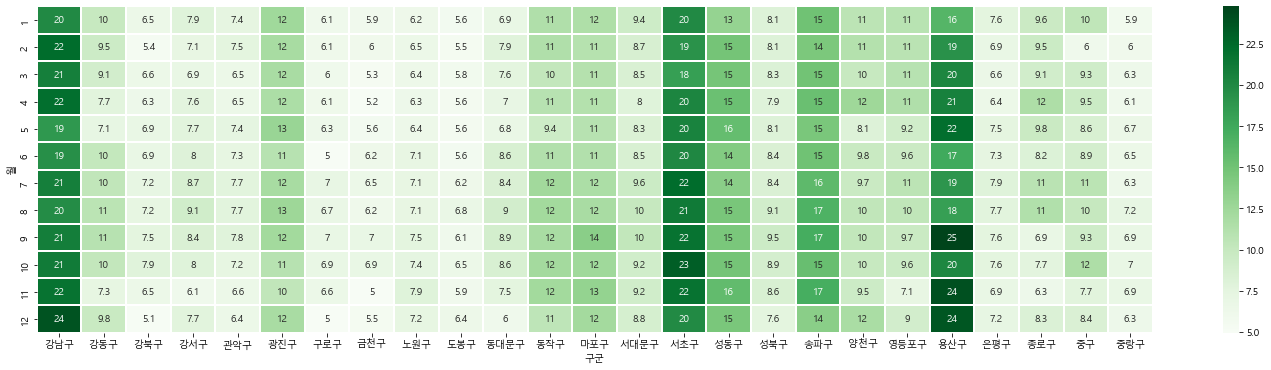

부산광역시


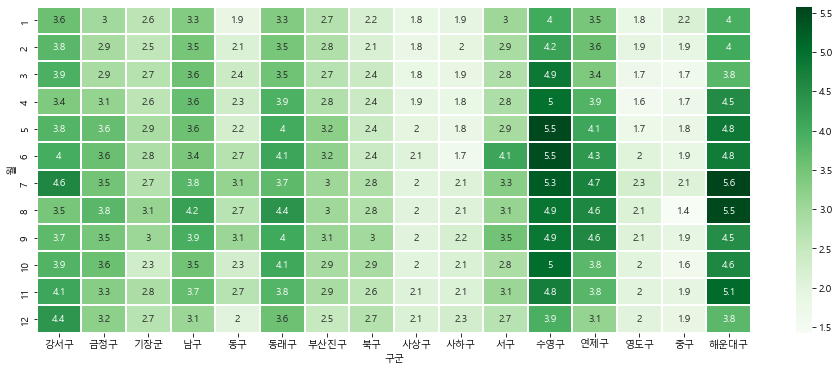

대구광역시


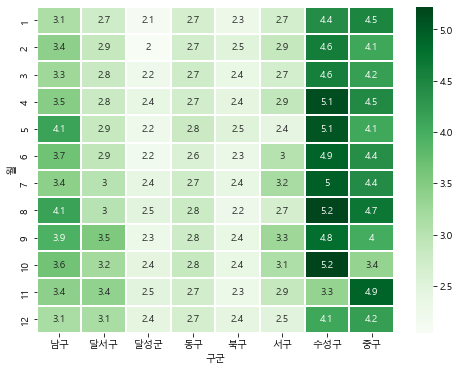

인천광역시


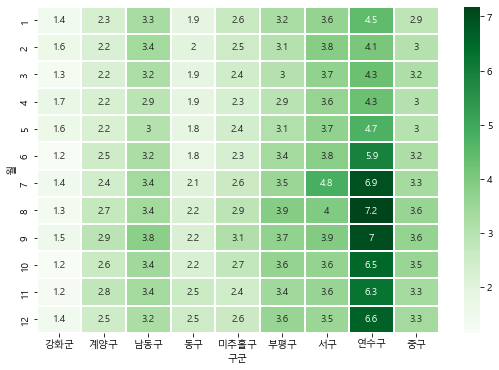

광주광역시


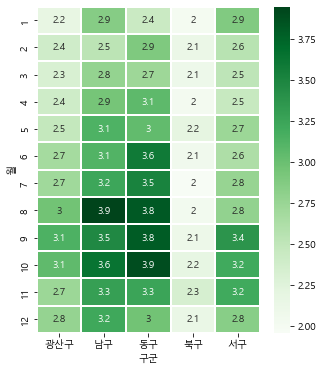

대전광역시


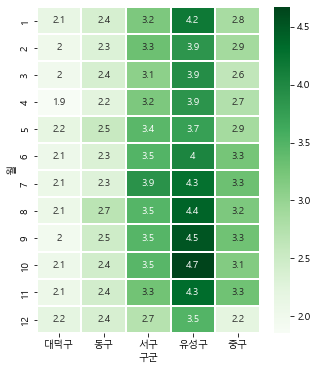

울산광역시


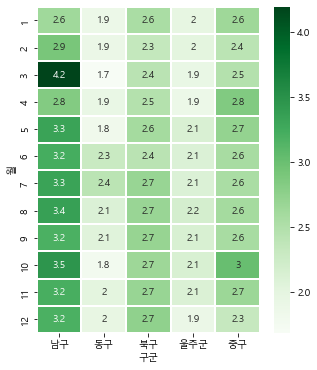

경기도


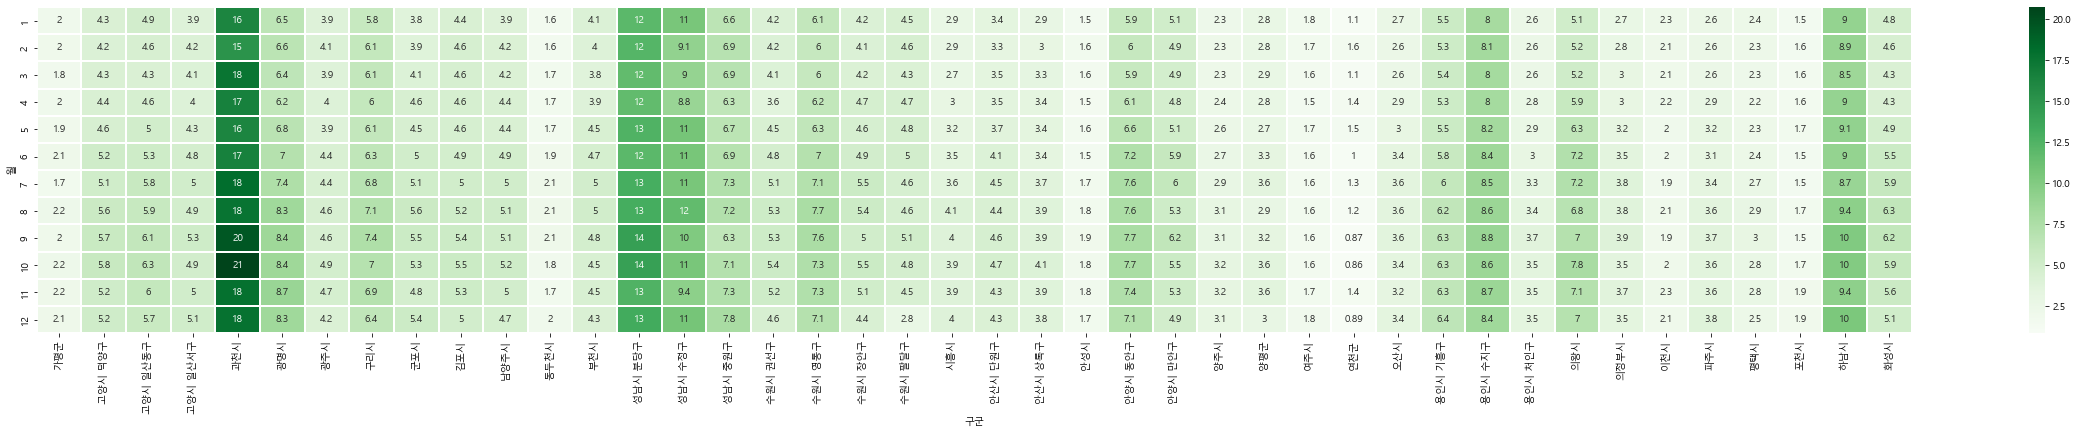

강원도


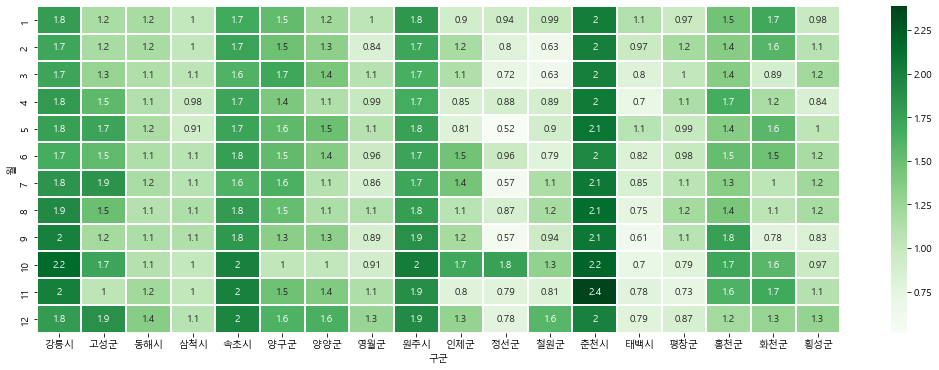

충청북도


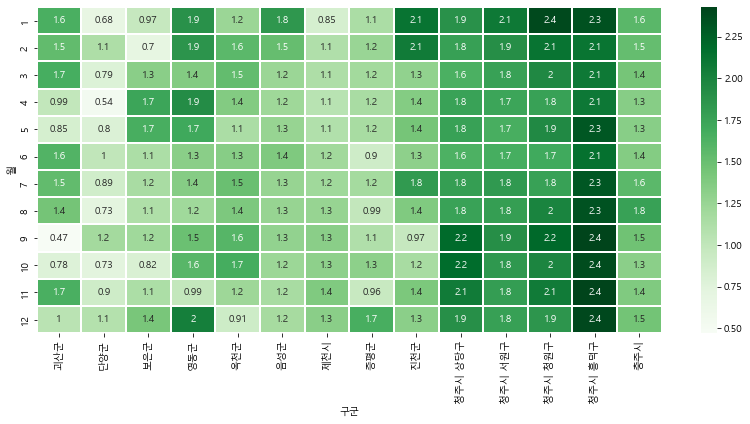

충청남도


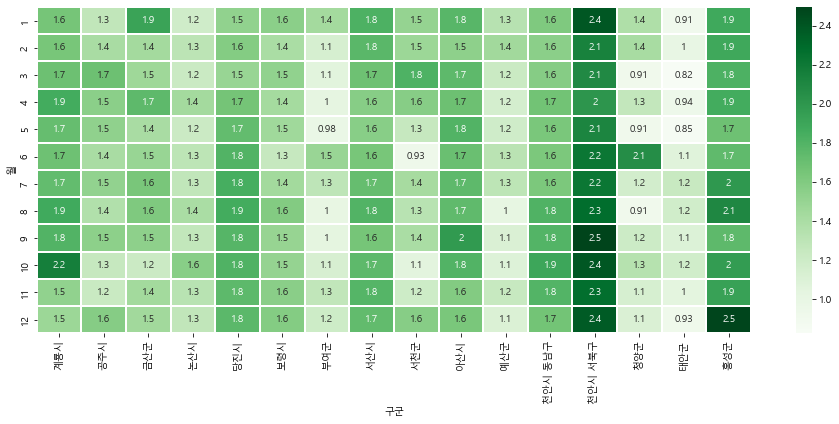

전라북도


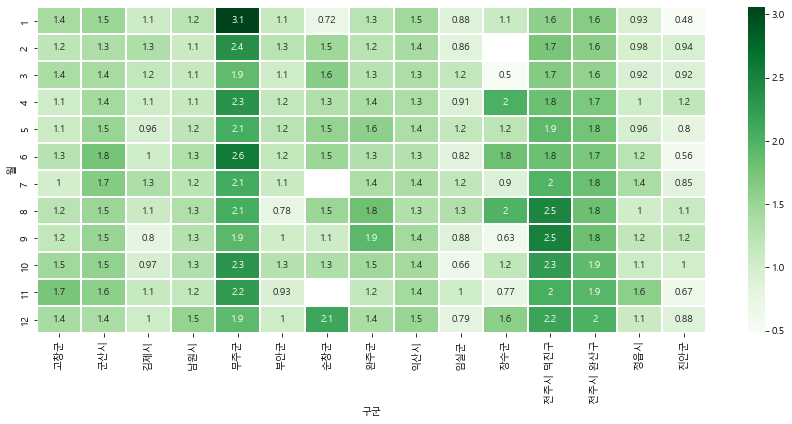

전라남도


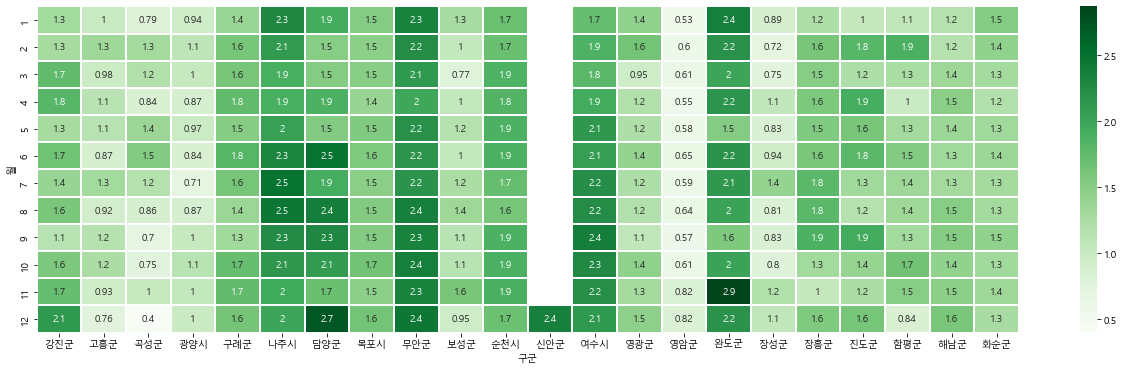

경상북도


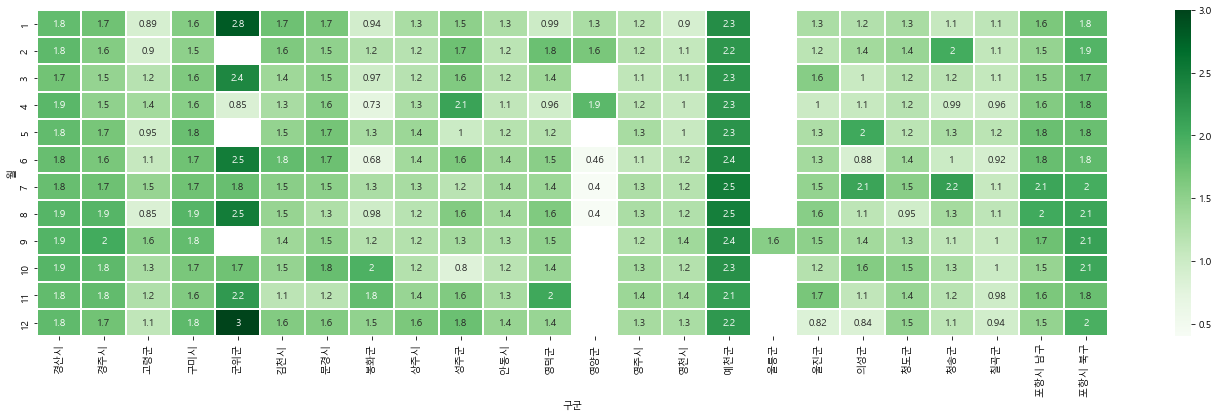

경상남도


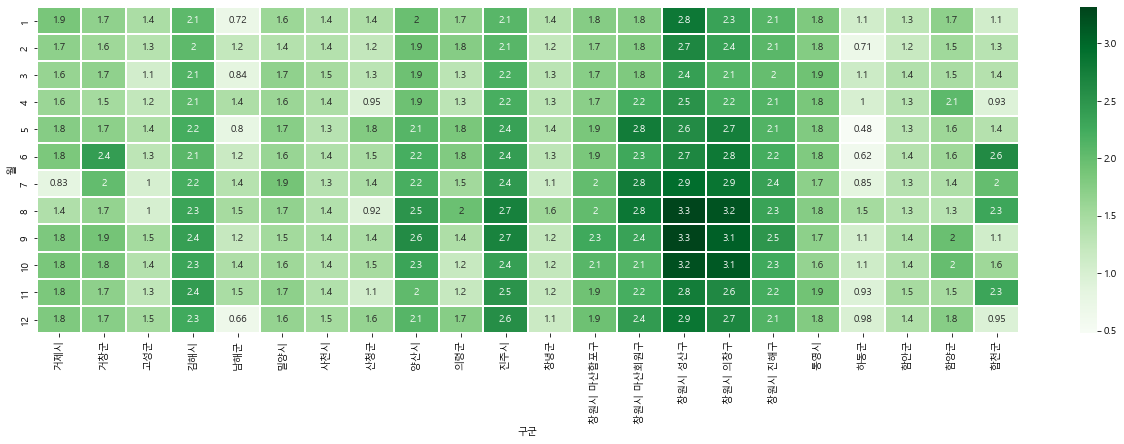

제주특별자치도


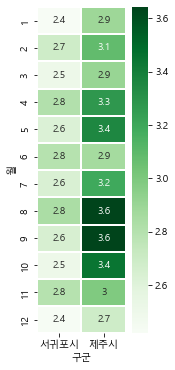

세종특별자치시


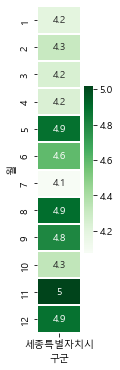

In [361]:
for sido in sido_list:
    print(sido)
    show_month_price_in_sido(apt_df, sido)

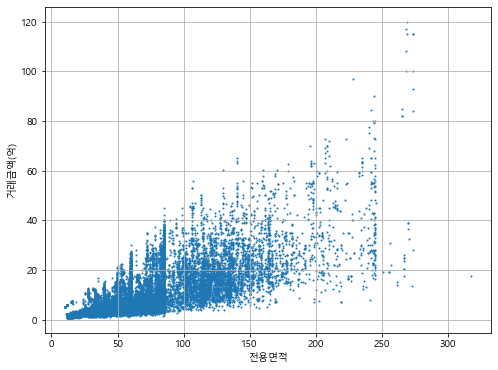

In [368]:
x = apt_df[ apt_df['시도']=='서울특별시' ]['전용면적']
y = apt_df[ apt_df['시도']=='서울특별시' ]['거래금액(억)']

plt.figure(figsize=(8,6))

plt.xlabel(x.name)
plt.ylabel(y.name)

plt.scatter(x, y, s=1)

plt.grid()
plt.show()

# 버거지수 클론

## 1. 버거킹 데이터 가져와서 정리

In [370]:
path = r'C:\Users\cypark\Desktop\Python을 활용한 빅데이터 분석 실무 실습자료\버거데이터 전처리전\버거킹.xlsx'
bgk_df = pd.read_excel(path)

In [372]:
# 결측 데이터 체크

bgk_df.isna().sum()

STOR_COORD_Y    1
STOR_COORD_X    1
ADDR_1          0
ADDR_2          0
STOR_NM         0
dtype: int64

In [376]:
bgk_df['ADDR_2'].unique()

array([' ', 'B동 1층 118호, 119호, 120호, 134호'], dtype=object)

In [385]:
# 시도 파트

bgk_df['ADDR_1'].apply( lambda x: x.strip().split(' ')[0]).unique()

array(['대구광역시', '인천광역시', '경기도', '부산광역시', '서울특별시', '강원도', '전라북도', '대전광역시',
       '울산광역시', '광주광역시', '경상북도', '경상남도', '전라남도', '충청남도', '충청북도',
       '세종특별자치시', '서울시', '제주특별자치도'], dtype=object)

In [386]:
def short_sido(x):
    if len(x)==4:
        return x[0]+x[2]
    else:
        return x[:2]

In [389]:
bgk_df['ADDR_1'].apply( lambda x: x.strip().split(' ')[0]).apply(short_sido).unique()

array(['대구', '인천', '경기', '부산', '서울', '강원', '전북', '대전', '울산', '광주', '경북',
       '경남', '전남', '충남', '충북', '세종', '제주'], dtype=object)

In [390]:
bgk_df['sido'] = bgk_df['ADDR_1'].apply( lambda x: x.strip().split(' ')[0]).apply(short_sido)

In [392]:
# 구군 파트

bgk_df['ADDR_1'].apply( lambda x: x.strip().split(' ')[1]).unique()

array(['달서구', '부평구', '성남시', '부산진구', '도봉구', '화성시', '영등포구', '시흥시', '서대문구',
       '수원시', '종로구', '남구', '강동구', '용인시', '계양구', '강북구', '춘천시', '군산시',
       '강남구', '구로구', '의정부시', '북구', '서구', '김포시', '전주시', '안양시', '속초시',
       '유성구', '중구', '파주시', '송파구', '고양시', '동작구', '연수구', '동구', '과천시', '양천구',
       '김천시', '수성구', '정읍시', '성북구', '창원시', '동대문구', '거제시', '광양시', '서산시',
       '해운대구', '포항시', '남동구', '천안시', '오산시', '무안군', '금정구', '관악구', '부천시',
       '구미시', '나주시', '강릉시', '이천시', '목포시', '경주시', '구리시', '은평구', '광진구',
       '김해시', '서초구', '평택시', '강서구', '마포구', '사상구', '경산시', '안동시', '익산시',
       '남양주시', '광명시', '중랑구', '노원구', '하남시', '광산구', '금천구', '진천군', '동래구',
       '기장군', '성동구', '보듬5로', '광주시', '양산시', '청주시', '충주시', '안산시', '청원군',
       '원주시', '상주시', '순천시', '동두천시', '홍천군', '안성시', '달성군', '용산구', '여수시',
       '당진시', '어울로', '진주시', '사하구', '사천시', '연제구', '한누리대로', '양평군', '홍성군',
       '양주시', '영주시', '보령시', '미추홀구', '군포시', '포천시', '보듬3로', '음성군', '제주시',
       '영도구', '제천시', '세종로', '칠곡군', '거창군'], dtype=object)

In [394]:
'보듬5로','보듬3로', '한누리대로','세종로'

In [396]:
# 예외체크
# 세종시 => 밑에 구나 군이 없음
# 세종은 구군도 '세종'이라고 통일합시다!

bgk_df[ bgk_df['ADDR_1'].apply( lambda x: x.strip().split(' ')[1]) == '세종로']

,STOR_COORD_Y,STOR_COORD_X,ADDR_1,ADDR_2,STOR_NM,sido
416,36.603726,127.289304,세종특별자치시 세종로 2425,,세종조치원DT점,세종


In [397]:
# 일단 저장 => 세종이 문제

bgk_df['gugun'] = bgk_df['ADDR_1'].apply( lambda x: x.strip().split(' ')[1])

In [403]:
# 구군에서 시도가 세종인 데이터만 '세종'이라고 직접 처리
# 이미 있는 데이터를 바꿀 때 => .loc
# 여러개의 데이터를 한번에 바꿀때 .loc[조건, 컬럼]

bgk_df.loc[ bgk_df['sido']=='세종' , 'gugun'] = '세종'

In [404]:
bgk_df[bgk_df['sido']=='세종']

,STOR_COORD_Y,STOR_COORD_X,ADDR_1,ADDR_2,STOR_NM,sido,gugun
176,36.516726,127.258386,세종특별자치시 보듬5로 6,,충남대병원DT점,세종,세종
272,36.481958,127.253939,세종특별자치시 어울로 77세종,,세종행복새롬점,세종,세종
290,36.490569,127.302849,세종특별자치시 한누리대로 1948,,세종반곡점,세종,세종
373,36.512236,127.242659,세종특별자치시 보듬3로 154,,세종고운점,세종,세종
414,36.478494,127.287376,세종특별자치시 한누리대로 2150,,세종시청점,세종,세종
416,36.603726,127.289304,세종특별자치시 세종로 2425,,세종조치원DT점,세종,세종


In [405]:
bgk_df['gugun'].unique()

array(['달서구', '부평구', '성남시', '부산진구', '도봉구', '화성시', '영등포구', '시흥시', '서대문구',
       '수원시', '종로구', '남구', '강동구', '용인시', '계양구', '강북구', '춘천시', '군산시',
       '강남구', '구로구', '의정부시', '북구', '서구', '김포시', '전주시', '안양시', '속초시',
       '유성구', '중구', '파주시', '송파구', '고양시', '동작구', '연수구', '동구', '과천시', '양천구',
       '김천시', '수성구', '정읍시', '성북구', '창원시', '동대문구', '거제시', '광양시', '서산시',
       '해운대구', '포항시', '남동구', '천안시', '오산시', '무안군', '금정구', '관악구', '부천시',
       '구미시', '나주시', '강릉시', '이천시', '목포시', '경주시', '구리시', '은평구', '광진구',
       '김해시', '서초구', '평택시', '강서구', '마포구', '사상구', '경산시', '안동시', '익산시',
       '남양주시', '광명시', '중랑구', '노원구', '하남시', '광산구', '금천구', '진천군', '동래구',
       '기장군', '성동구', '세종', '광주시', '양산시', '청주시', '충주시', '안산시', '청원군',
       '원주시', '상주시', '순천시', '동두천시', '홍천군', '안성시', '달성군', '용산구', '여수시',
       '당진시', '진주시', '사하구', '사천시', '연제구', '양평군', '홍성군', '양주시', '영주시',
       '보령시', '미추홀구', '군포시', '포천시', '음성군', '제주시', '영도구', '제천시', '칠곡군',
       '거창군'], dtype=object)

# 학원데이터 DF 로 정리하고 아파트 가격에 붙일 수 있을지 고민